In [1]:
#  Copyright 2022 Institute of Advanced Research in Artificial Intelligence (IARAI) GmbH.
#  IARAI licenses this file to You under the Apache License, Version 2.0
#  (the "License"); you may not use this file except in compliance with
#  the License. You may obtain a copy of the License at
#  http://www.apache.org/licenses/LICENSE-2.0
#  Unless required by applicable law or agreed to in writing, software
#  distributed under the License is distributed on an "AS IS" BASIS,
#  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#  See the License for the specific language governing permissions and
#  limitations under the License.

In [2]:
import os
import sys

In [3]:
# Alternatevly, in order to make the module imports work properly set PYTHONPATH=$PWD before launching the notebook server from the repo root folder.
sys.path.insert(0, os.path.abspath("../"))  # noqa:E402

![t4c20logo](../t4c20logo.png)

In [4]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.core.display import HTML

from IPython.display import display

from t4c22.misc.t4c22_logging import t4c_apply_basic_logging_config
from t4c22.t4c22_config import load_basedir
import t4c22
from t4c22.t4c22_config import load_eta_labels

import itertools
from pathlib import Path

In [5]:
%matplotlib inline
%load_ext autoreload
%load_ext time
%autoreload 2
%autosave 60

display(HTML("<style>.container { width:80% !important; }</style>"))

The time module is not an IPython extension.


Autosaving every 60 seconds


In [6]:
t4c_apply_basic_logging_config(loglevel="INFO")

In [7]:
# load BASEDIR from file, change to your data root
# BASEDIR = load_basedir(fn="t4c22_config.json", pkg=t4c22)
# or
BASEDIR = Path("your path")

In [8]:
city = "london"
# city = "melbourne"
# city = "madrid"
city

'london'

In [9]:
# London 	2019-07-06 - 2020-01-31
# Madrid 	2021-06-01 - 2021-12-31
# Melbourne 	2020-06-01 - 2020-12-30
# TODO search sample locations for other cities?
day = "2019-07-06"

### Load Static Data

In [10]:
nodes = pd.read_parquet(BASEDIR / "road_graph" / city / "road_graph_nodes.parquet")
counters = nodes[nodes["counter_info"] != ""]
counters

,node_id,counter_info,num_assigned,x,y
3,101818,01/285,1,-0.148104,51.535179
4,101831,02/065,1,-0.147044,51.535612
6,101839,02/077,1,-0.152666,51.537513
8,101843,01/225,1,-0.163682,51.534939
11,101870,01/557,1,-0.167320,51.529630
...,...,...,...,...,...
58525,2558111688715178165,5288,1,-0.286553,51.291753
58526,7889378430193093482,1069,1,-0.308409,51.295005
58527,2285140568209560452,4982,1,-0.014778,51.268887
58528,7056784350608841276,3216,1,-0.236904,51.262352


In [11]:
df_edges = pd.read_parquet(BASEDIR / "road_graph" / city / "road_graph_edges.parquet")
df_edges

,u,v,parsed_maxspeed,speed_kph,importance,highway,oneway,lanes,tunnel,length_meters,...,node_id_u,counter_info_u,num_assigned_u,x_u,y_u,node_id_v,counter_info_v,num_assigned_v,x_v,y_v
0,78112,25508583,32.2,32.2,0,unclassified,False,,,19.402386,...,78112,,,-0.145792,51.526976,25508583,,,-0.145783,51.526802
1,78112,25508584,32.2,32.2,0,unclassified,False,,,63.881347,...,78112,,,-0.145792,51.526976,25508584,,,-0.145807,51.527550
2,78112,3257621681005534125,32.2,32.2,0,residential,True,,,82.385612,...,78112,,,-0.145792,51.526976,3257621681005534125,,,-0.145514,51.527545
3,99936,2146383887,32.2,32.2,0,unclassified,False,,,8.076410,...,99936,,,-0.152791,51.523611,2146383887,,,-0.152679,51.523630
4,99936,4544836433,32.2,32.2,0,unclassified,True,,,46.803240,...,99936,,,-0.152791,51.523611,4544836433,01/284,1,-0.152916,51.524016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132409,4595139612105786518,8842311879,35.1,35.1,0,residential,False,,,13.486853,...,4595139612105786518,,,-0.299336,51.588589,8842311879,,,-0.299144,51.588568
132410,8230831116681660864,1149426165,35.1,35.1,0,residential,False,,,60.246550,...,8230831116681660864,,,-0.037311,51.680737,1149426165,,,-0.036685,51.680487
132411,1688447984145568529,26559620,32.2,32.2,3,primary,True,2,,4.845324,...,1688447984145568529,,,-0.133773,51.508549,26559620,,,-0.133746,51.508589
132412,3771856370570656347,9402106041,20.0,20.0,0,unclassified,True,,,8.118341,...,3771856370570656347,,,-0.217833,51.549140,9402106041,,,-0.217936,51.549106


In [12]:
df_supersegments = pd.read_parquet(BASEDIR / "road_graph" / city / "road_graph_supersegments.parquet")
df_supersegments

,identifier,nodes
0,"6369329155,1763373559","[6369329155, 435104715, 20460687, 25497872, 25..."
1,"6369329155,13799040","[6369329155, 435104715, 20460687, 25497872, 25..."
2,"6369329155,471260337","[6369329155, 435104715, 20460687, 25497872, 25..."
3,"6369329155,107792","[6369329155, 25497611, 20965797, 6369329166, 2..."
4,"6369329155,2180693488","[6369329155, 25497611, 20965797, 6369329166, 2..."
...,...,...
5425,"295504,253017418","[295504, 7204481383, 1768869066, 1451902681, 2..."
5426,"206879979,4471336236","[206879979, 530611, 242774388, 1488974289, 304..."
5427,"4471336236,206879979","[4471336236, 10929041, 1451875456, 2334831045,..."
5428,"206879979,1587640187","[206879979, 530611, 242774388, 1488975343, 148..."


In [13]:
df_supersegments_exploded = df_supersegments.explode("nodes")
df_supersegments_exploded

,identifier,nodes
0,"6369329155,1763373559",6369329155
0,"6369329155,1763373559",435104715
0,"6369329155,1763373559",20460687
0,"6369329155,1763373559",25497872
0,"6369329155,1763373559",25497845
...,...,...
5429,"1587640187,206879979",1488974289
5429,"1587640187,206879979",304051
5429,"1587640187,206879979",304060
5429,"1587640187,206879979",304061


### Load Labels

In [14]:
df_etas_day = load_eta_labels(basedir=BASEDIR, day=day, city=city, df_filter=None)
df_etas_day

,identifier,day,t,eta
0,"6369329155,1763373559",2019-07-06,0,472.139390
1,"6369329155,13799040",2019-07-06,0,198.066078
2,"6369329155,471260337",2019-07-06,0,696.035819
3,"6369329155,107792",2019-07-06,0,413.796090
4,"6369329155,2180693488",2019-07-06,0,531.376108
...,...,...,...,...
521275,"295504,253017418",2019-07-06,95,867.936468
521276,"206879979,4471336236",2019-07-06,95,991.431106
521277,"4471336236,206879979",2019-07-06,95,1040.909462
521278,"206879979,1587640187",2019-07-06,95,470.848998


### Load Historic ETAs

In [16]:
def expand_hourly_to_all_times_of_day(df):
    data = list(itertools.chain(*[[{**r, "t": r["h"] * 4 + offset} for offset in range(4)] for r in df.to_dict("records")]))
    df = pd.DataFrame.from_dict(data)
    df["eta_mean-std"] = df["eta_mean"] - df["eta_std"]
    df["eta_mean+std"] = df["eta_mean"] + df["eta_std"]
    return df

In [17]:
df_etas_hourly_all_week_historic = expand_hourly_to_all_times_of_day(
    pd.read_parquet(BASEDIR / "expected_time_of_arrival_distribution" / city / "expected_time_of_arrival_distribution_hour_all_week.parquet").reset_index()
)
df_etas_hourly_all_week_historic

,identifier,h,eta_min,eta_max,eta_mean,eta_med,eta_std,t,eta_mean-std,eta_mean+std
0,"101900,101918",0,121.343366,763.834797,195.106835,185.363585,41.781473,0,153.325363,236.888308
1,"101900,101918",0,121.343366,763.834797,195.106835,185.363585,41.781473,1,153.325363,236.888308
2,"101900,101918",0,121.343366,763.834797,195.106835,185.363585,41.781473,2,153.325363,236.888308
3,"101900,101918",0,121.343366,763.834797,195.106835,185.363585,41.781473,3,153.325363,236.888308
4,"101900,101918",1,143.790395,1386.625402,189.444930,179.174095,62.614850,4,126.830080,252.059780
...,...,...,...,...,...,...,...,...,...,...
520795,"99937,7561148554",22,210.756309,1208.246051,363.591918,318.667795,131.253132,91,232.338786,494.845051
520796,"99937,7561148554",23,193.507647,1505.065027,325.247199,295.495384,121.632410,92,203.614789,446.879609
520797,"99937,7561148554",23,193.507647,1505.065027,325.247199,295.495384,121.632410,93,203.614789,446.879609
520798,"99937,7561148554",23,193.507647,1505.065027,325.247199,295.495384,121.632410,94,203.614789,446.879609


In [18]:
df_etas_hourly_weekend_historic = expand_hourly_to_all_times_of_day(
    pd.read_parquet(BASEDIR / "expected_time_of_arrival_distribution" / city / "expected_time_of_arrival_distribution_hour_weekend.parquet").reset_index()
)
df_etas_hourly_weekend_historic

,identifier,h,eta_min,eta_max,eta_mean,eta_med,eta_std,t,eta_mean-std,eta_mean+std
0,"101900,101918",0,150.103973,763.834797,205.237325,191.768809,62.076654,0,143.160672,267.313979
1,"101900,101918",0,150.103973,763.834797,205.237325,191.768809,62.076654,1,143.160672,267.313979
2,"101900,101918",0,150.103973,763.834797,205.237325,191.768809,62.076654,2,143.160672,267.313979
3,"101900,101918",0,150.103973,763.834797,205.237325,191.768809,62.076654,3,143.160672,267.313979
4,"101900,101918",1,143.790395,288.363632,189.586439,180.277974,22.568364,4,167.018075,212.154804
...,...,...,...,...,...,...,...,...,...,...
520795,"99937,7561148554",22,232.680758,1208.246051,360.918981,309.756992,152.168711,91,208.750270,513.087692
520796,"99937,7561148554",23,218.911015,1505.065027,341.343306,297.965855,152.147275,92,189.196031,493.490581
520797,"99937,7561148554",23,218.911015,1505.065027,341.343306,297.965855,152.147275,93,189.196031,493.490581
520798,"99937,7561148554",23,218.911015,1505.065027,341.343306,297.965855,152.147275,94,189.196031,493.490581


In [19]:
df_etas_hourly_workdays_historic = expand_hourly_to_all_times_of_day(
    pd.read_parquet(BASEDIR / "expected_time_of_arrival_distribution" / city / "expected_time_of_arrival_distribution_hour_workdays.parquet").reset_index()
)
df_etas_hourly_workdays_historic

,identifier,h,eta_min,eta_max,eta_mean,eta_med,eta_std,t,eta_mean-std,eta_mean+std
0,"101900,101918",0,121.343366,385.993110,191.307902,182.056457,30.195670,0,161.112232,221.503571
1,"101900,101918",0,121.343366,385.993110,191.307902,182.056457,30.195670,1,161.112232,221.503571
2,"101900,101918",0,121.343366,385.993110,191.307902,182.056457,30.195670,2,161.112232,221.503571
3,"101900,101918",0,121.343366,385.993110,191.307902,182.056457,30.195670,3,161.112232,221.503571
4,"101900,101918",1,148.609950,1386.625402,189.391864,179.174095,72.148798,4,117.243066,261.540662
...,...,...,...,...,...,...,...,...,...,...
520795,"99937,7561148554",22,210.756309,990.160771,364.594270,321.767250,122.744994,91,241.849276,487.339264
520796,"99937,7561148554",23,193.507647,1432.828641,319.211158,294.975403,107.658248,92,211.552910,426.869407
520797,"99937,7561148554",23,193.507647,1432.828641,319.211158,294.975403,107.658248,93,211.552910,426.869407
520798,"99937,7561148554",23,193.507647,1432.828641,319.211158,294.975403,107.658248,94,211.552910,426.869407


## Plot supetsegments of interest

In [20]:
def supersegments_containing_edge(u, v):
    return df_supersegments_exploded[df_supersegments_exploded["nodes"] == u].merge(
        df_supersegments_exploded[df_supersegments_exploded["nodes"] == v], on="identifier"
    )

In [21]:
MAX_NUM = 3

In [22]:
def plot_supersegment_daylines(u, v, max_num=MAX_NUM):
    df_supersegments_containing_edge = supersegments_containing_edge(u, v)
    df_supersegments_containing_edge_with_eta = df_supersegments_containing_edge.merge(df_etas_day, on="identifier")
    supersegments_containing_edge_identifiers = list({r["identifier"] for r in df_supersegments_containing_edge_with_eta.to_dict("records")})

    print(f"Found {len(supersegments_containing_edge_identifiers)} supersegments containing {(u,v)}")

    supersegments_containing_edge_identifiers = supersegments_containing_edge_identifiers[:max_num]
    num_supersegments = len(supersegments_containing_edge_identifiers)
    fig, axs = plt.subplots(num_supersegments, figsize=(30, 5 * num_supersegments), tight_layout=True, sharex=True)
    for i, identifier in enumerate(supersegments_containing_edge_identifiers):
        ax = axs[i] if num_supersegments > 1 else axs
        # print(identifier)
        df_ = df_supersegments_containing_edge_with_eta[df_supersegments_containing_edge_with_eta["identifier"] == identifier]
        sns.lineplot(data=df_, x="t", y="eta", ax=ax)
        df_ = df_etas_hourly_workdays_historic[df_etas_hourly_workdays_historic["identifier"] == identifier]
        sns.lineplot(data=df_, x="t", y="eta_min", ax=ax, color="grey")
        sns.lineplot(data=df_, x="t", y="eta_max", ax=ax, color="grey")
        sns.lineplot(data=df_, x="t", y="eta_med", ax=ax, color="green")
        sns.lineplot(data=df_, x="t", y="eta_mean", ax=ax, color="orange")
        ax.fill(
            list(range(96)) + list(range(95, -1, -1)), list(df_["eta_mean-std"].values) + list(reversed(df_["eta_mean+std"].values)), color="orange", alpha=0.25
        )

## London bridge, northbound

In [23]:
u = 3240063179
v = 6032044868

Found 11 supersegments containing (3240063179, 6032044868)


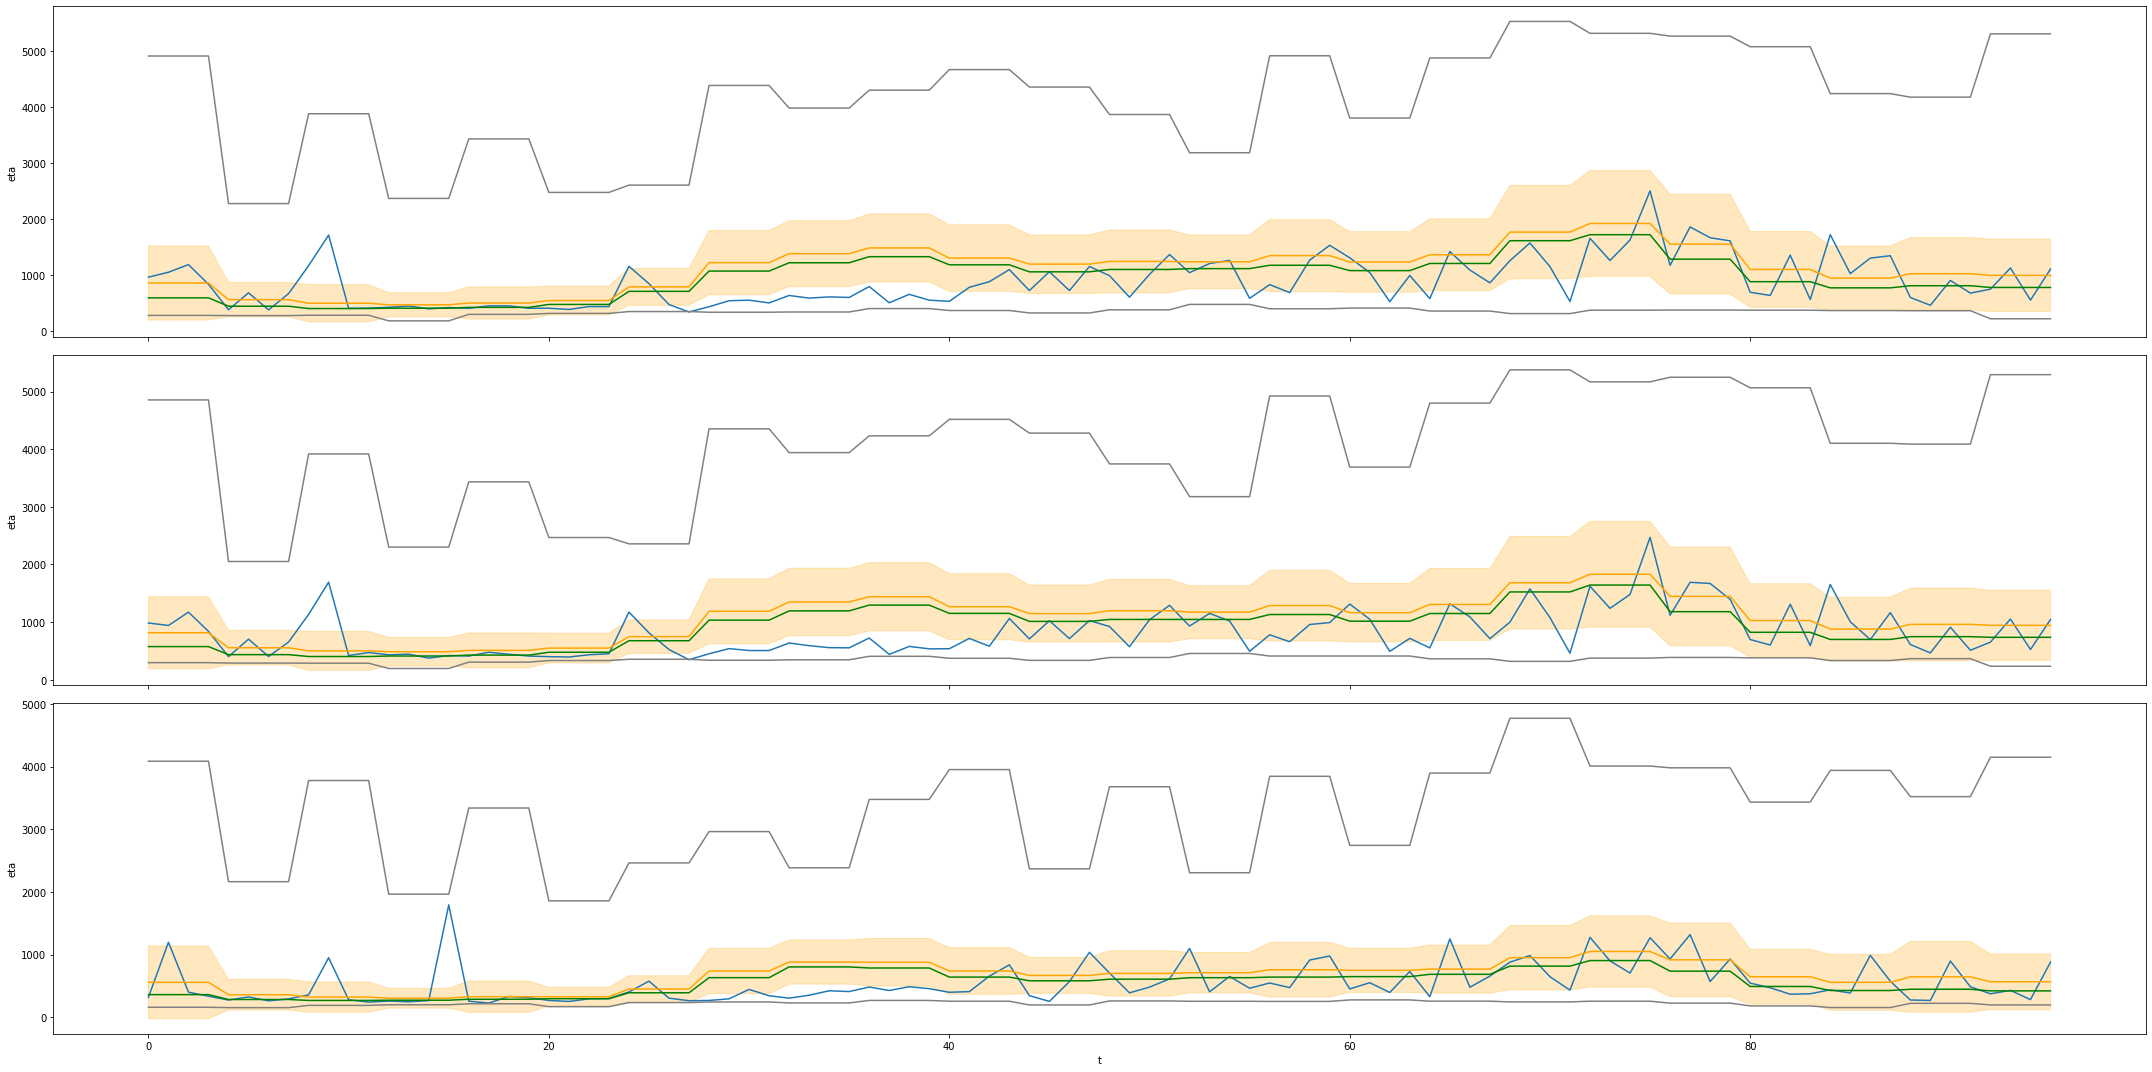

In [24]:
plot_supersegment_daylines(u, v)

## Elephant and castle, northbound

In [25]:
u = 2180693488
v = 1868411754

Found 45 supersegments containing (2180693488, 1868411754)


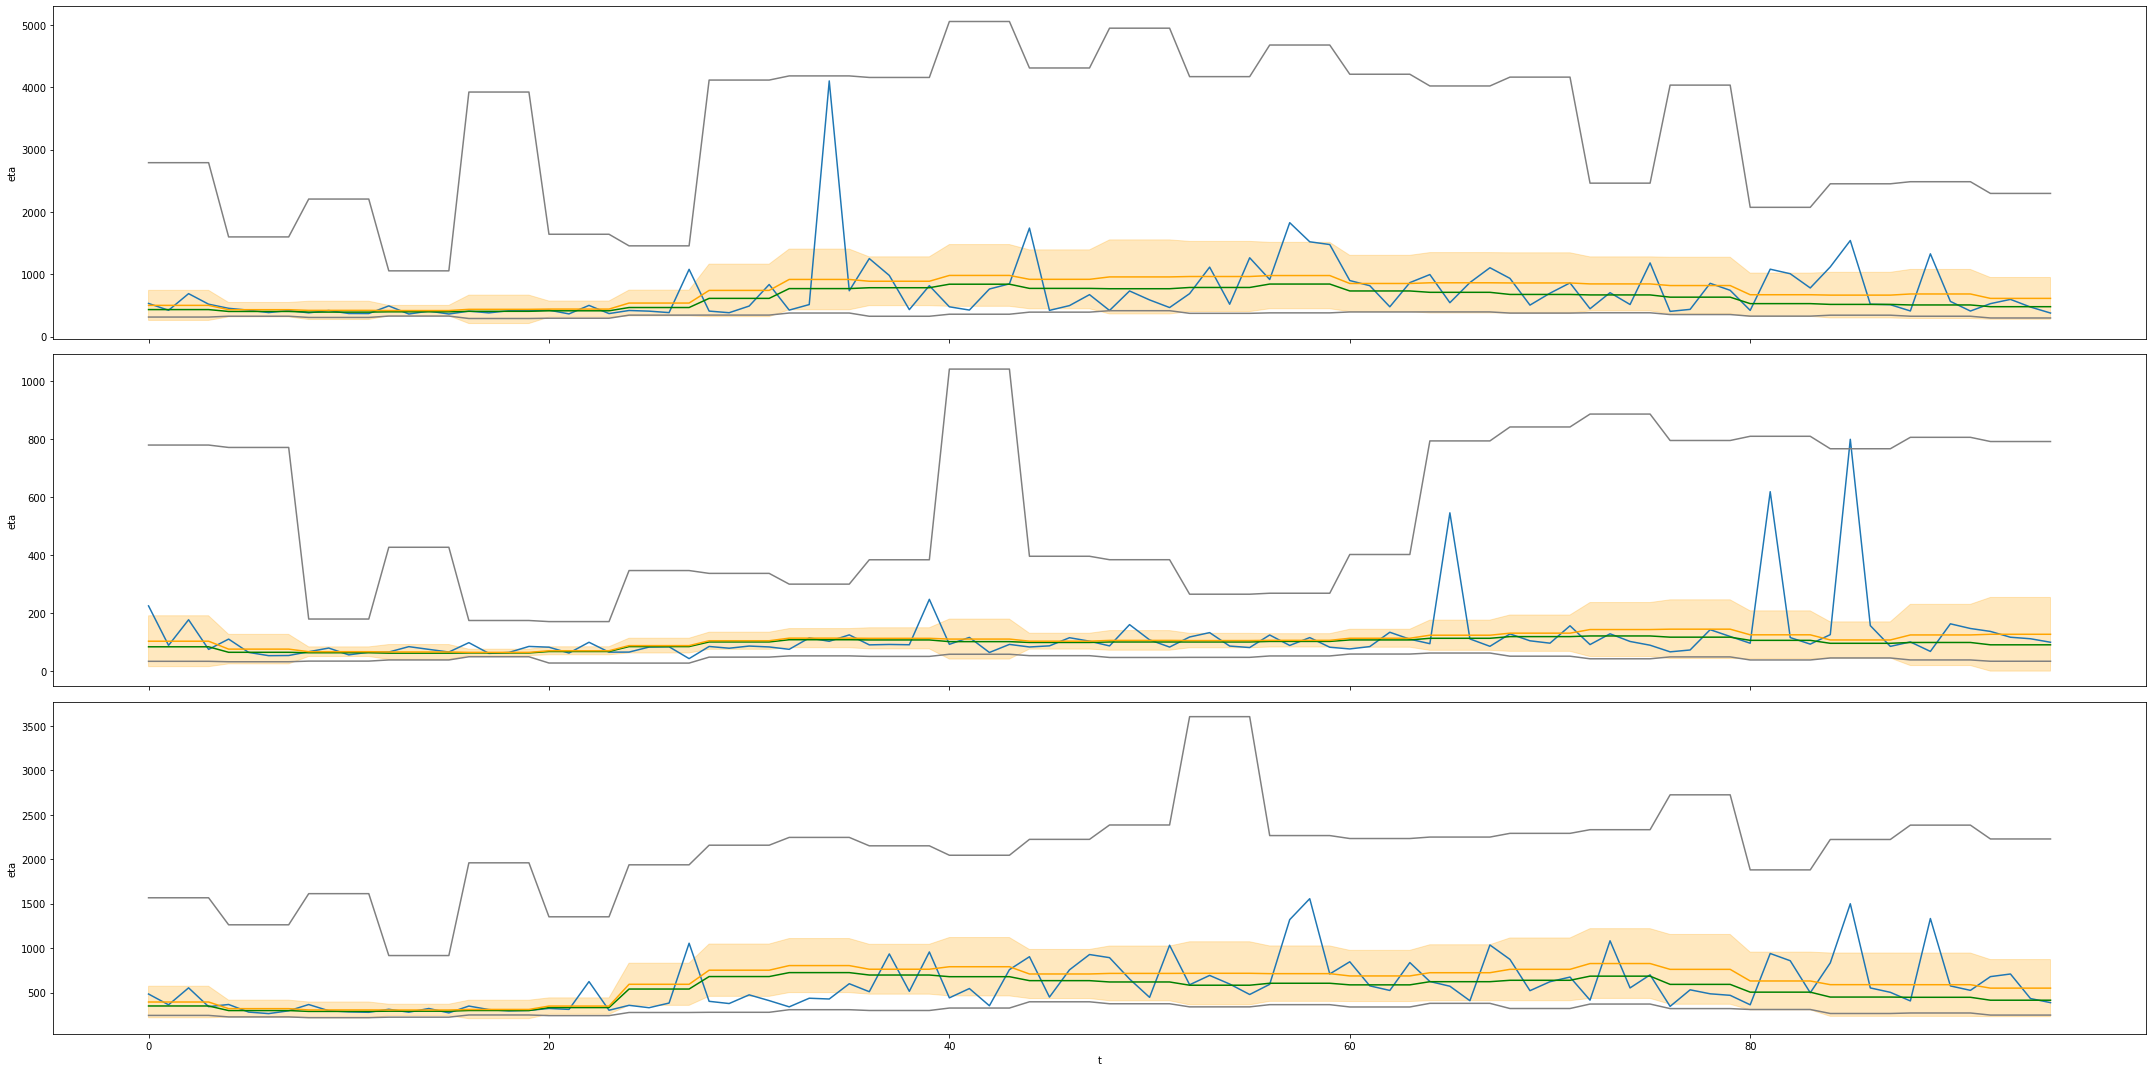

In [26]:
plot_supersegment_daylines(u, v)
# TODO one peak going over max - what's wrong here?

## Marleybone flyover, eastbound

In [27]:
u = 1178910690
v = 197630

Found 10 supersegments containing (1178910690, 197630)


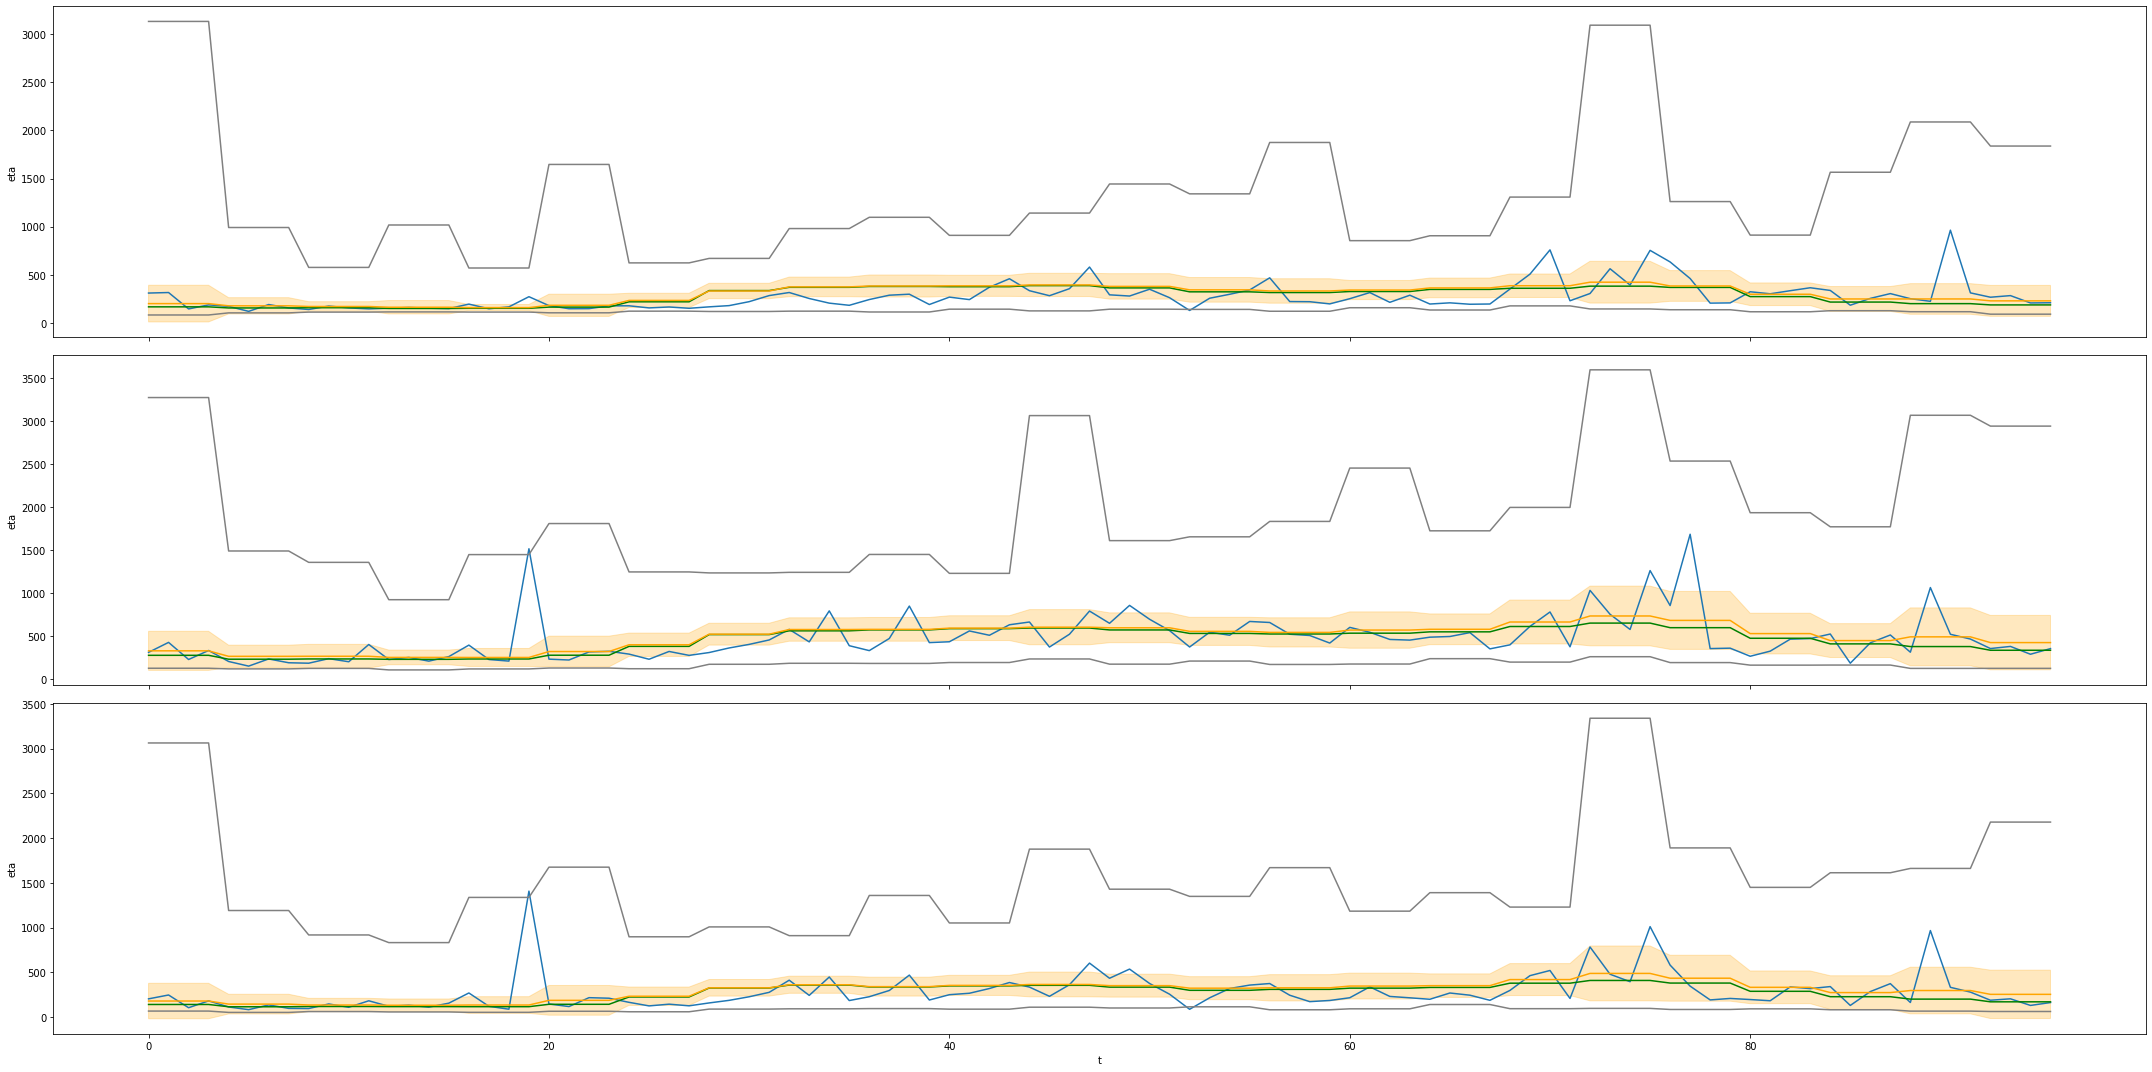

In [28]:
plot_supersegment_daylines(u, v)

## M25 near Waltham, eastbound

In [29]:
u = 4737949241782541459
v = 5177230596161574999

Found 2 supersegments containing (4737949241782541459, 5177230596161574999)


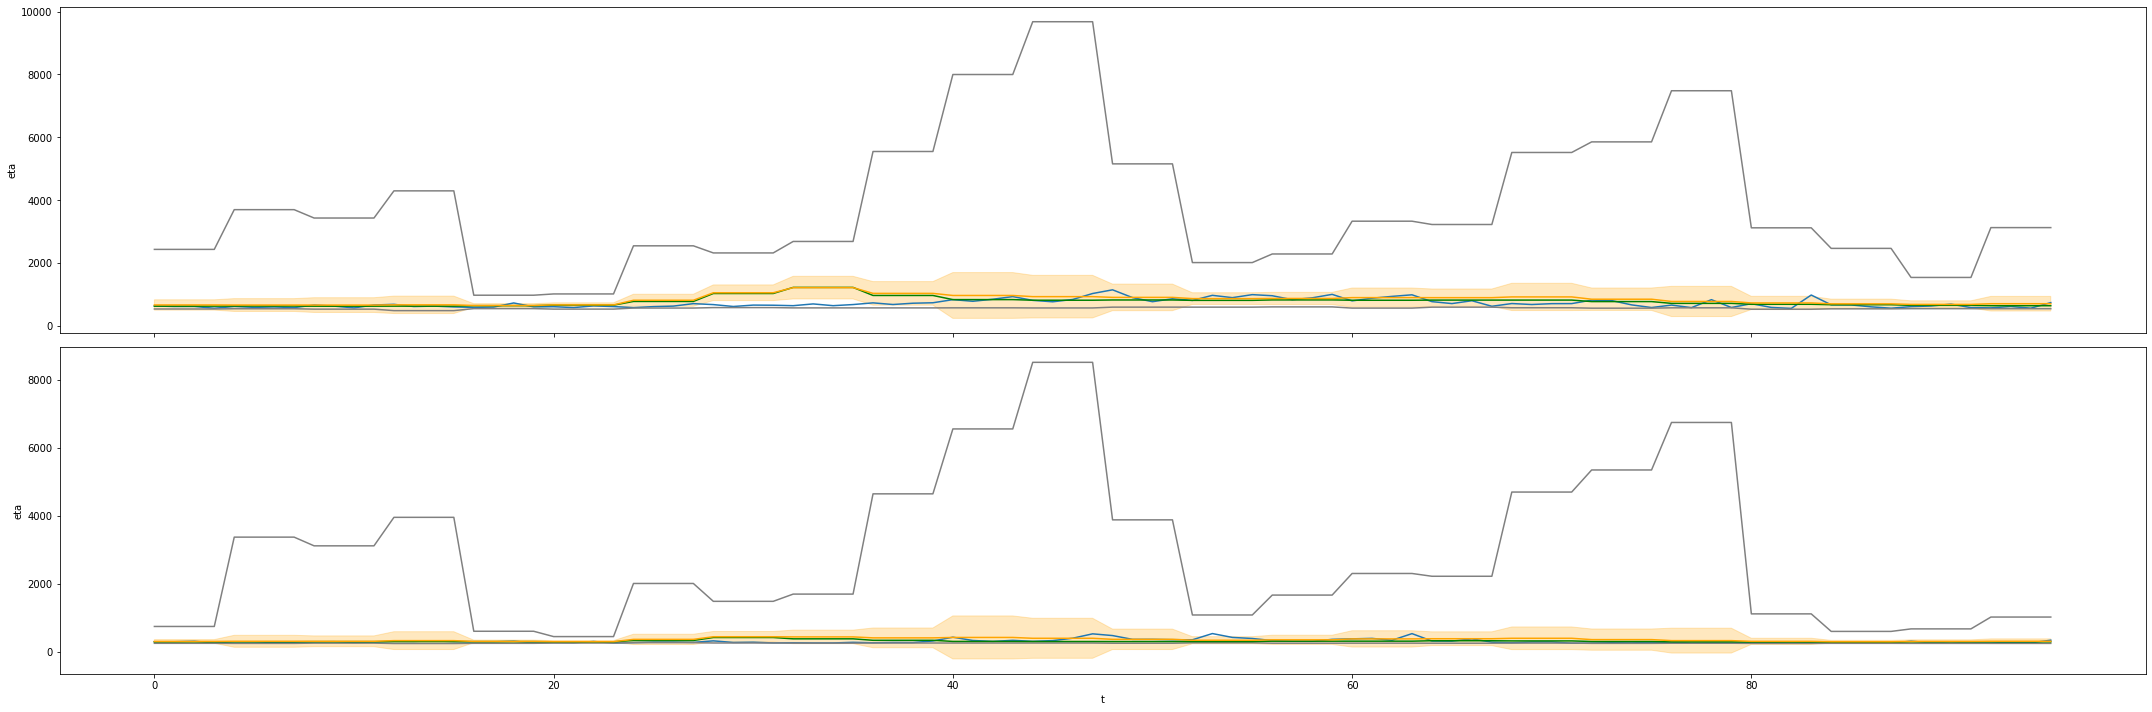

In [30]:
plot_supersegment_daylines(u, v)

## M25 near Potters Bar, westbound

In [31]:
u = 8995114026285597218
v = 196709089314436495

In [32]:
# plot_supersegment_daylines(u,v)

## at counter 08/093

In [33]:
u = 2180661925
v = 8953368684960847732

Found 37 supersegments containing (2180661925, 8953368684960847732)


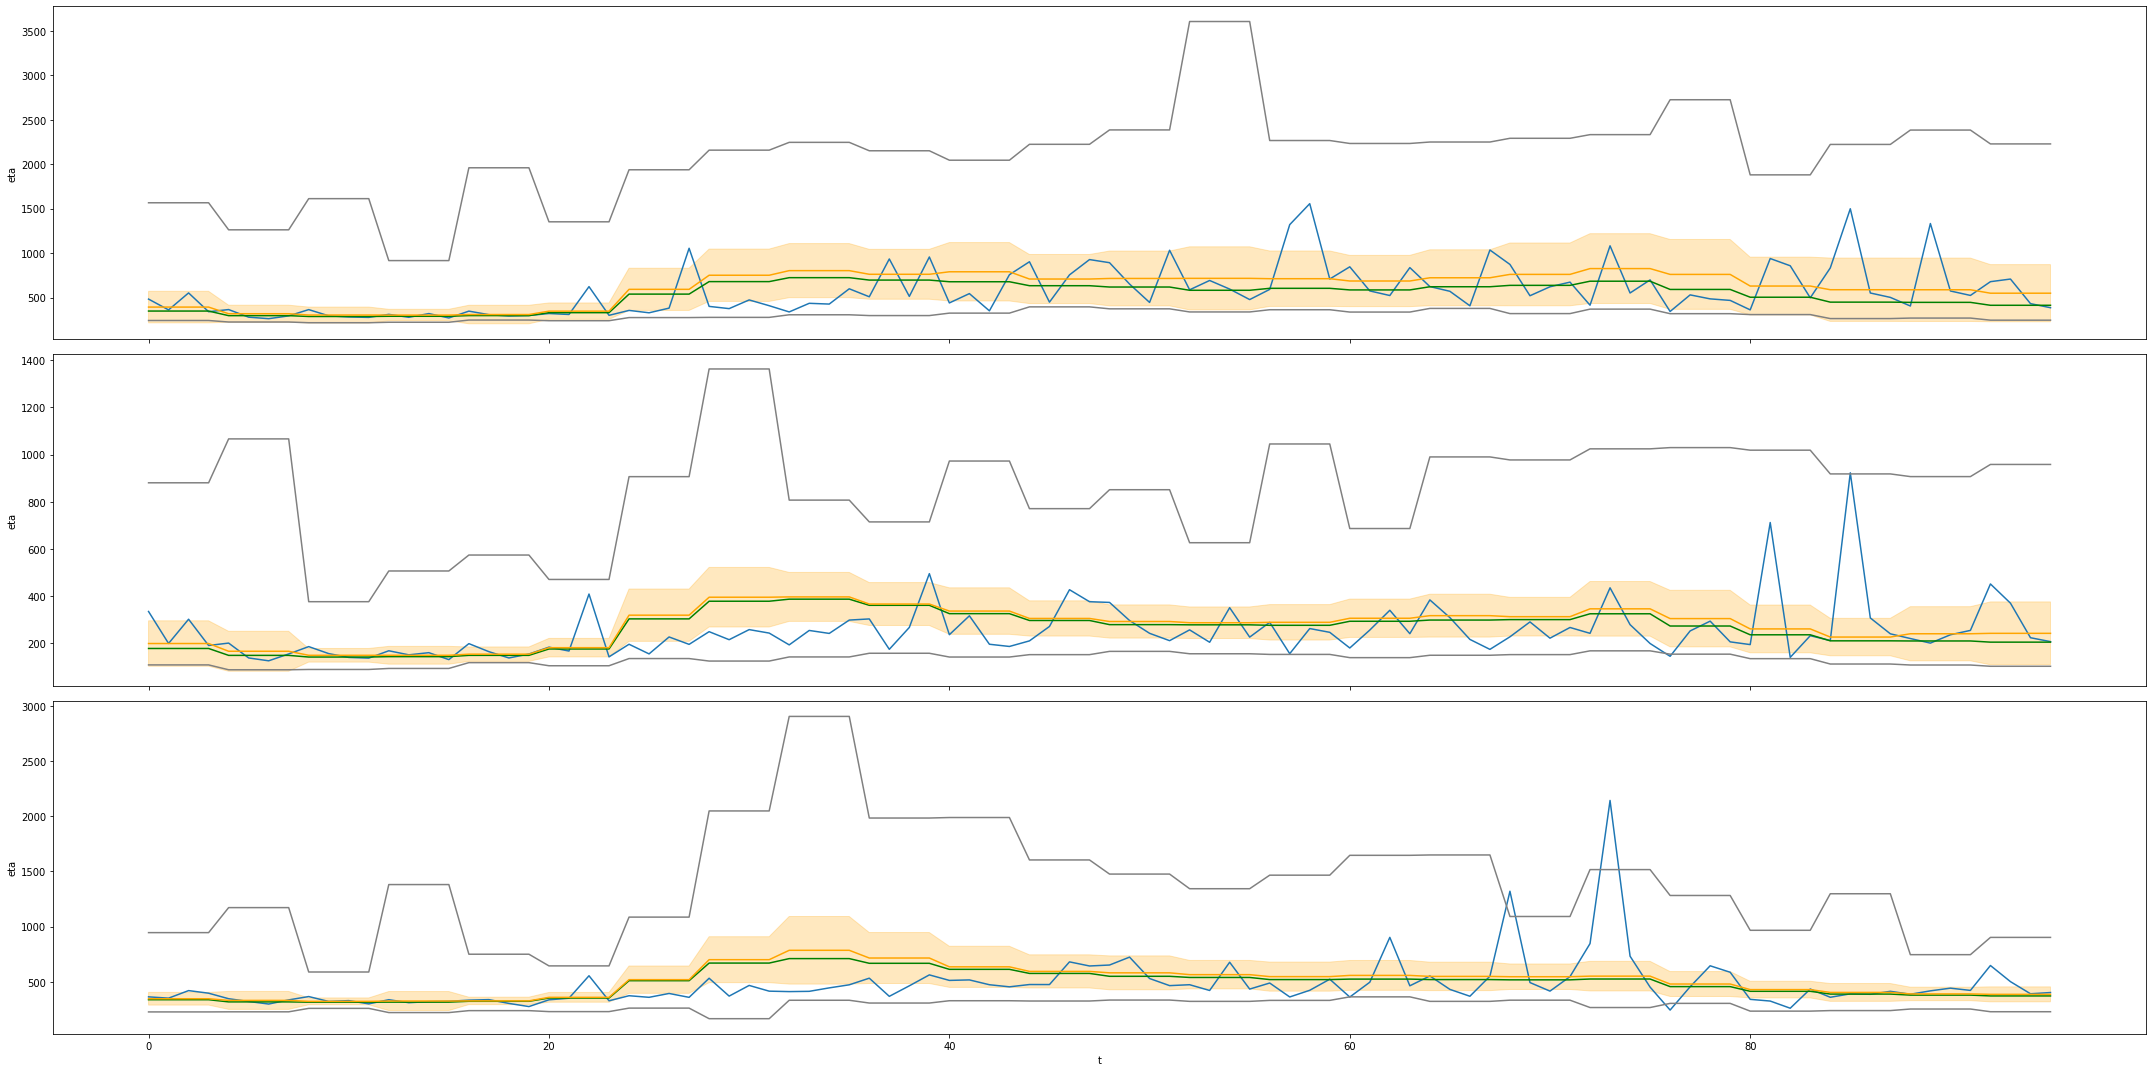

In [34]:
plot_supersegment_daylines(u, v)